<h2>Step 1 : Dataset Selection and Confirmation

The dataset used is the Consumer Airfare Report (Table 5) - Detailed Fare Information, containing 14,881 records with 21 columns.
<br><b>Key Features:
<li>mkt_fare – Market Fare (Target Variable)
<li>Year – Year of fare record
<li>quarter – Quarter of the year
<li>carpaxshare – Passenger share per airline
<li>caravgfare – Average fare per airline
<li>fareinc_min, fareinc_max – Minimum and maximum fare increment

<a href = 'https://catalog.data.gov/dataset/consumer-airfare-report-table-5-detailed-fare-information-for-highest-and-lowest-fare-mark'> Dataset Link</a>

<h2> Step 2 : Data Acquisition and Inspection

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Loading the dataset
df = pd.read_csv("Consumer_Airfare_Report__Table_5_-_Detailed_Fare_Information_For_Highest_and_Lowest_Fare_Markets_Under_750_Miles.csv")

# Display basic information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14881 entries, 0 to 14880
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tbl                14881 non-null  object 
 1   Year               14881 non-null  int64  
 2   quarter            14881 non-null  int64  
 3   mkt_fare           14881 non-null  float64
 4   citymarketid_1     14881 non-null  int64  
 5   citymarketid_2     14881 non-null  int64  
 6   city1              14881 non-null  object 
 7   city2              14881 non-null  object 
 8   carairlineid       14881 non-null  int64  
 9   car                14881 non-null  object 
 10  carpax             14881 non-null  int64  
 11  carpaxshare        14881 non-null  float64
 12  caravgfare         14881 non-null  float64
 13  fareinc_min        14881 non-null  int64  
 14  fareinc_minpaxsh   14881 non-null  float64
 15  fareinc_max        14881 non-null  int64  
 16  f

In [18]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
       tbl  Year  quarter  mkt_fare  citymarketid_1  citymarketid_2  \
0  Table 5  2006        3     87.41           34057           31884   
1  Table 5  1997        4    224.47           30721           30198   
2  Table 5  2003        1    234.32           31995           30852   
3  Table 5  1998        3     71.25           32467           33195   
4  Table 5  1999        3    235.25           30713           30325   

                            city1                               city2  \
0                    Portland, OR                         Spokane, WA   
1  Boston, MA (Metropolitan Area)                      Pittsburgh, PA   
2       Greensboro/High Point, NC  Washington, DC (Metropolitan Area)   
3   Miami, FL (Metropolitan Area)       Tampa, FL (Metropolitan Area)   
4                       Boise, ID                          Denver, CO   

   carairlineid car  ...  carpaxshare  caravgfare  fareinc_min  \
0         19393  WN  ...         0.59       80.44    

In [10]:
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nSummary Statistics:")
print(df.describe())


Duplicate Rows: 0

Summary Statistics:
               Year       quarter      mkt_fare  citymarketid_1  \
count  14881.000000  14881.000000  14881.000000    14881.000000   
mean    2006.962771      2.405887    191.415304    31533.511390   
std        8.541106      1.100905     87.373419     1268.335167   
min     1996.000000      1.000000     56.420000    30135.000000   
25%     1999.000000      1.000000     95.960000    30647.000000   
50%     2005.000000      2.000000    225.690000    31057.000000   
75%     2014.000000      3.000000    264.080000    32211.000000   
max     2024.000000      4.000000    426.630000    35412.000000   

       citymarketid_2  carairlineid        carpax   carpaxshare    caravgfare  \
count    14881.000000  14881.000000  1.488100e+04  14881.000000  14881.000000   
mean     32250.924400  19811.653249  2.480694e+04      0.444372    191.655678   
std       1405.832698    858.277666  4.611529e+04      0.261597     91.030092   
min      30158.000000     -1.000

<h2> Step 3 : Data Cleaning and Preparation

In [ ]:
# Dropping columns Geocoded_City1 and Geocoded_City2 as it has too many missing values
df_cleaned = df.drop(columns=['Geocoded_City1', 'Geocoded_City2'])

numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Convert categorical variables to category type
categorical_cols = ['tbl', 'city1', 'city2', 'car']
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype('category')

# Encoding categorical variables into numerical values
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].cat.codes

print("\nCleaned Dataset Information:")
df_cleaned.info()

print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())

<h2>Step 4: Exploratory Data Analysis(EDA) with Static Visualization

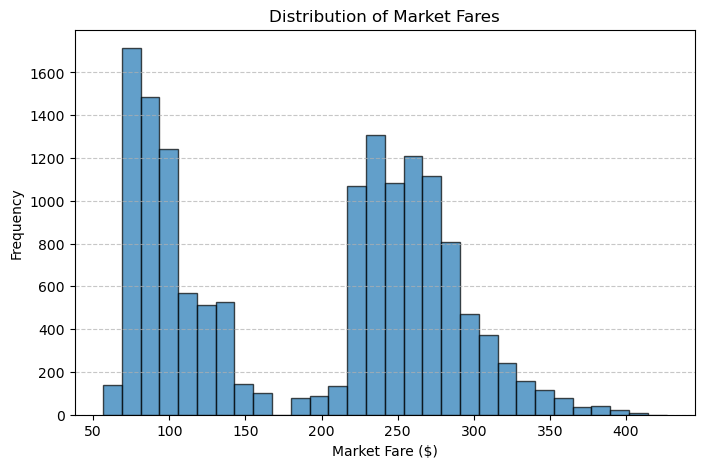

In [12]:
# Histogram of Market Fare Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned["mkt_fare"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Market Fare ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Market Fares")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

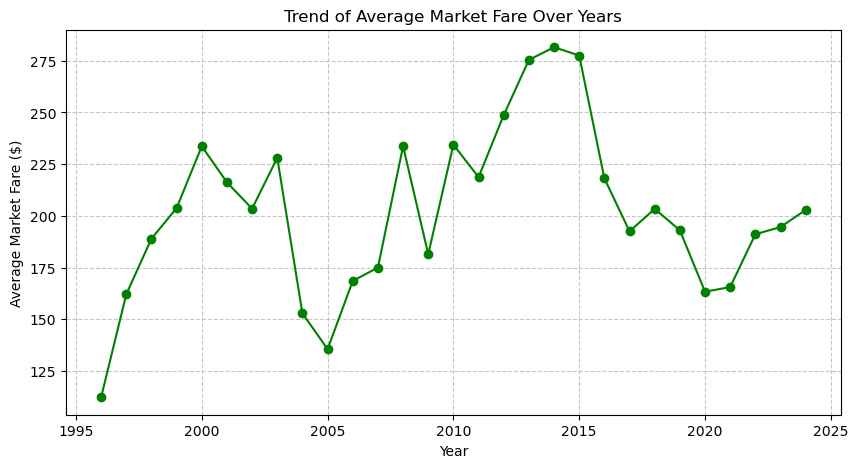

In [23]:
# Line plot of Average Market Fare over the Years
plt.figure(figsize=(10, 5))
df_yearly_fare = df_cleaned.groupby("Year")["mkt_fare"].mean()
plt.plot(df_yearly_fare.index, df_yearly_fare.values, marker="o", linestyle="-", color="green")
plt.xlabel("Year")
plt.ylabel("Average Market Fare ($)")
plt.title("Trend of Average Market Fare Over Years")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

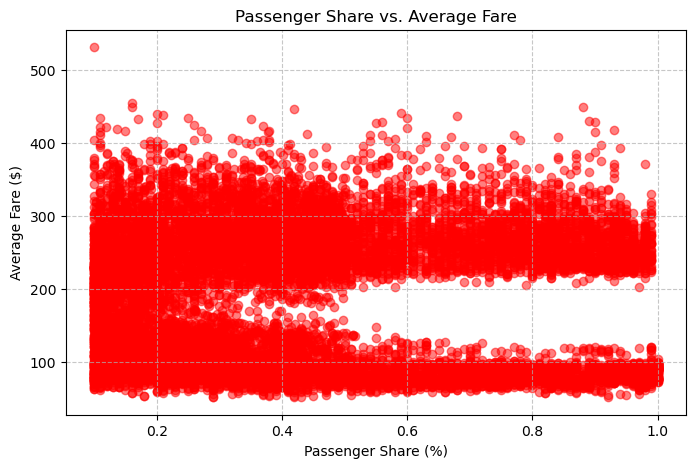

In [14]:
# Scatter plot of Passenger Share vs. Average Fare
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned["carpaxshare"], df_cleaned["caravgfare"], alpha=0.5, color="red")
plt.xlabel("Passenger Share (%)")
plt.ylabel("Average Fare ($)")
plt.title("Passenger Share vs. Average Fare")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

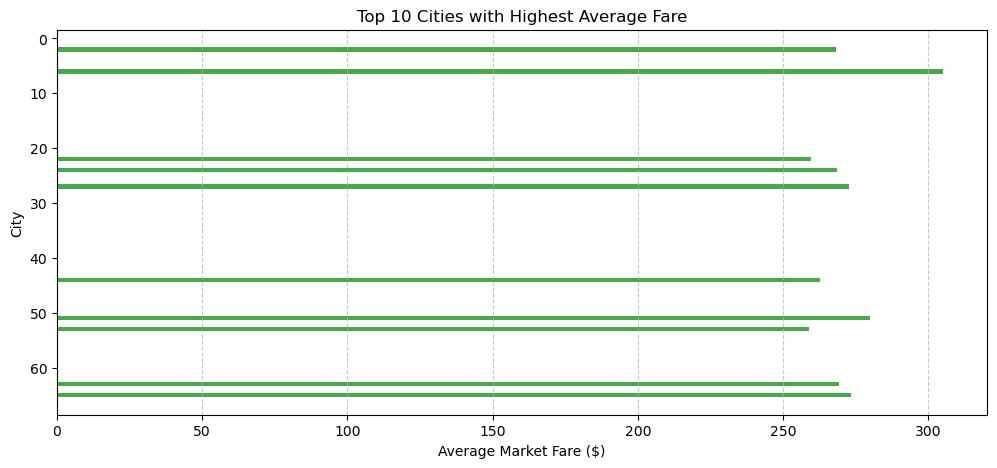

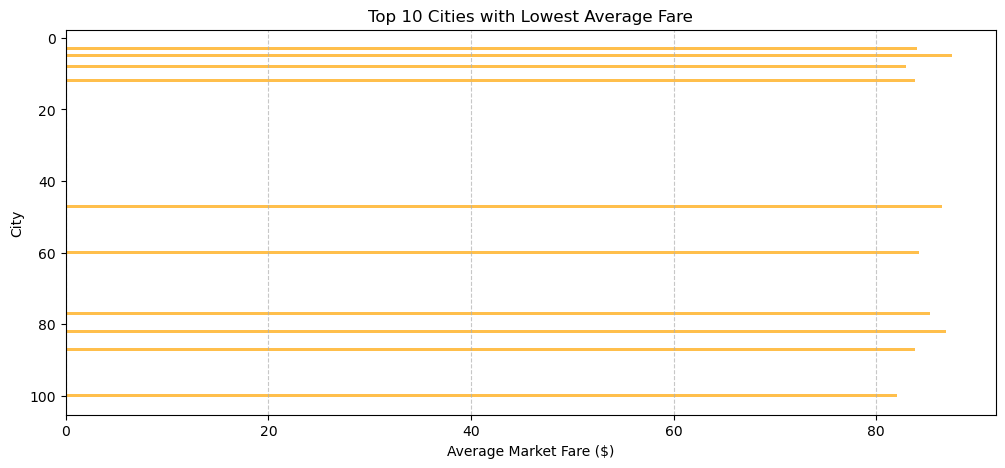

In [17]:
# Bar plot of Top 10 Markets with Highest and Lowest Average Fare
top_10_highest = df_cleaned.groupby("city1")["mkt_fare"].mean().nlargest(10)
top_10_lowest = df_cleaned.groupby("city1")["mkt_fare"].mean().nsmallest(10)

plt.figure(figsize=(12, 5))
plt.barh(top_10_highest.index, top_10_highest.values, color="green", alpha=0.7)
plt.xlabel("Average Market Fare ($)")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest Average Fare")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 5))
plt.barh(top_10_lowest.index, top_10_lowest.values, color="orange", alpha=0.7)
plt.xlabel("Average Market Fare ($)")
plt.ylabel("City")
plt.title("Top 10 Cities with Lowest Average Fare")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

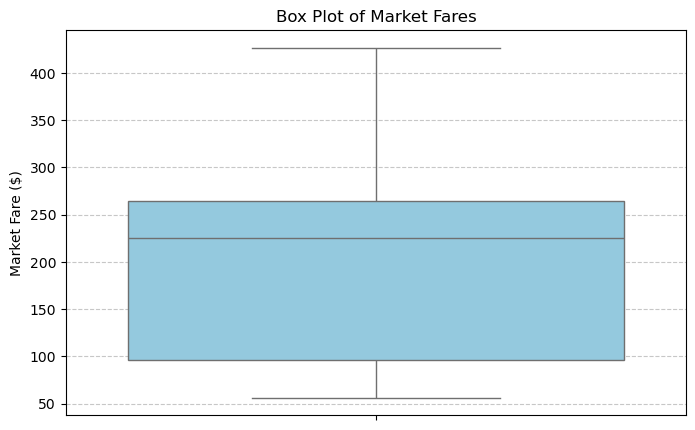

In [22]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned["mkt_fare"], color="skyblue")
plt.ylabel("Market Fare ($)")
plt.title("Box Plot of Market Fares")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<h2>Step 5: Advanced Analysis

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Select features and target variable
features = ["Year", "quarter", "carpaxshare", "caravgfare", "fareinc_min", "fareinc_max"]
target = "mkt_fare"

X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
best_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
best_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_best = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print("\nModel Performance - XGBoost Regressor")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")



Model Performance - XGBoost Regressor
Mean Absolute Error (MAE): 9.77
Mean Squared Error (MSE): 287.01
Root Mean Squared Error (RMSE): 16.94
R-squared Score (R²): 0.9628


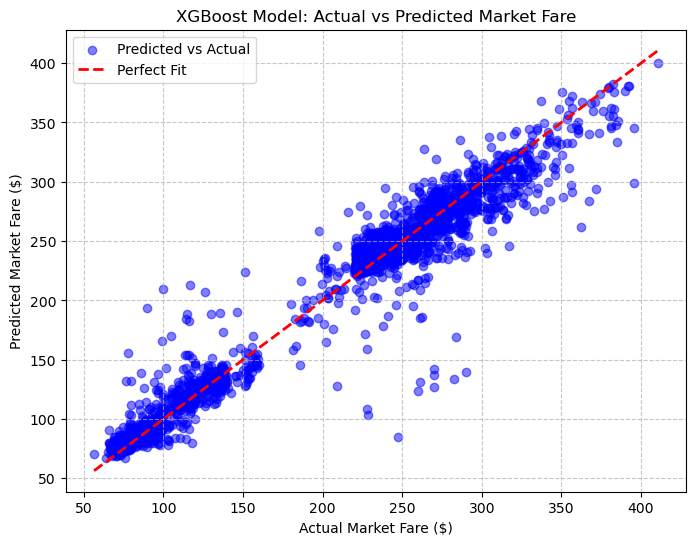

In [20]:
# Scatter plot: Actual vs Predicted Market Fare
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Market Fare ($)")
plt.ylabel("Predicted Market Fare ($)")
plt.title("XGBoost Model: Actual vs Predicted Market Fare")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()